In [1]:
import sys
sys.path.append('src')

from common.util import get_common_subsequences, ROOT
from classifier.data import augment_kvasir_vqa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv 

load_dotenv()

c:\Users\emanu\Desktop\Tesi\kvasir-vqa\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
df = pd.read_csv(f"{ROOT}{os.getenv('KVASIR_VQA_CSV')}")

In [3]:
df.head()

,source,question,answer,img_id
0,Ulcerative Colitis,Are there any abnormalities in the image? Chec...,ulcerative colitis,cla820gl0s3nv071u4fgd7xgq
1,Ulcerative Colitis,Are there any anatomical landmarks in the imag...,none,cla820gl0s3nv071u4fgd7xgq
2,Ulcerative Colitis,Are there any instruments in the image? Check ...,none,cla820gl0s3nv071u4fgd7xgq
3,Ulcerative Colitis,Have all polyps been removed?,not relevant,cla820gl0s3nv071u4fgd7xgq
4,Ulcerative Colitis,Is this finding easy to detect?,yes,cla820gl0s3nv071u4fgd7xgq


In [4]:
df.describe()

,source,question,answer,img_id
count,58849,58849,58798,58849
unique,5,20,501,6500
top,Ulcerative Colitis,Have all polyps been removed?,none,clb0kvxuz8zw4074yheicg35d
freq,16890,3945,10520,18


In [5]:
df['answer'].isna().sum()

np.int64(51)

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.describe()

,source,question,answer,img_id
count,58798,58798,58798,58798
unique,5,19,501,6449
top,Ulcerative Colitis,Have all polyps been removed?,none,clb0kvxuz8zw4074yheicg35d
freq,16884,3945,10520,18


In [8]:
questions = list(sorted(df.question.unique()))

In [9]:
questions

['Are there any abnormalities in the image? Check all that are present.',
 'Are there any anatomical landmarks in the image? Check all that are present.',
 'Are there any instruments in the image? Check all that are present.',
 'Does this image contain any finding?',
 'Have all polyps been removed?',
 'How many findings are present?',
 'How many instrumnets are in the image?',
 'How many polyps are in the image?',
 'Is there a green/black box artefact?',
 'Is there text?',
 'Is this finding easy to detect?',
 'What color is the abnormality? If more than one separate with ;',
 'What color is the anatomical landmark? If more than one separate with ;',
 'What is the size of the polyp?',
 'What type of polyp is present?',
 'What type of procedure is the image taken from?',
 'Where in the image is the abnormality?',
 'Where in the image is the anatomical landmark?',
 'Where in the image is the instrument?']

In [10]:
common_subsequences = get_common_subsequences(questions)

common_subsequences

[{'subsequence': 'What', 'freq': 5},
 {'subsequence': 'Where in the image is the', 'freq': 3},
 {'subsequence': 'Where in the image is', 'freq': 3},
 {'subsequence': 'Where in the image', 'freq': 3},
 {'subsequence': 'Are there any', 'freq': 3},
 {'subsequence': 'Where in the', 'freq': 3},
 {'subsequence': 'Are there', 'freq': 3},
 {'subsequence': 'How many', 'freq': 3},
 {'subsequence': 'Where in', 'freq': 3},
 {'subsequence': 'Where', 'freq': 3},
 {'subsequence': 'Are', 'freq': 3},
 {'subsequence': 'How', 'freq': 3},
 {'subsequence': 'Is', 'freq': 3},
 {'subsequence': 'What color is the', 'freq': 2},
 {'subsequence': 'What color is', 'freq': 2},
 {'subsequence': 'What type of', 'freq': 2},
 {'subsequence': 'What color', 'freq': 2},
 {'subsequence': 'What type', 'freq': 2},
 {'subsequence': 'Is there', 'freq': 2}]

<BarContainer object of 19 artists>

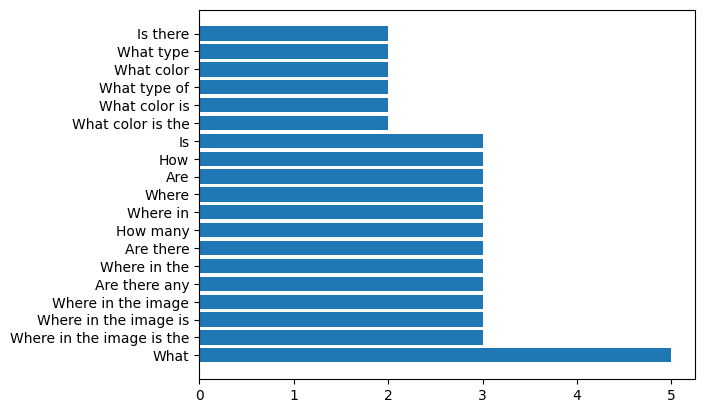

In [11]:
X = list(map(lambda x: x['subsequence'], common_subsequences))

y = list(map(lambda x: x['freq'], common_subsequences))

plt.barh(X, y)

In [12]:
questions_length = list(map(lambda x: len(x.split(' ')), df.question.tolist()))

max_length = np.max(questions_length)
mean_length = np.mean(questions_length)

print(f"Max question length is: {max_length}")
print(f"Mean question length is: {int(mean_length)}")

Max question length is: 13
Mean question length is: 7


In [13]:
df['answer'].value_counts()

answer
none                                                                                     10520
no                                                                                        8382
yes                                                                                       6861
0                                                                                         4538
1                                                                                         4380
                                                                                         ...  
center; lower-center; lower-left; upper-left                                                 1
grey; black; white                                                                           1
black; grey; white                                                                           1
center; center-left; center-right; lower-right; upper-center; upper-left; upper-right        1
red; grey                                  

In [14]:
all_answers = df['answer'].value_counts()
threshold = 8
answer_aug = [k for k, v in all_answers.items() if v < 8]

In [15]:
print(f"Answers for augmentation: {len(answer_aug)}")

Answers for augmentation: 354


In [16]:
aug_df = None
new_df = None

In [18]:
if len(os.listdir(os.getenv('KVASIR_VQA_DATA_AUG'))) == 0:
    aug_df = augment_kvasir_vqa(df, answer_aug, threshold)
    new_df = pd.concat([df, aug_df], axis=0)
    new_df.to_csv(f"{ROOT}/{os.getenv('KVASIR_VQA_CSV_AUG')}", index=False)
else:
    new_df = pd.read_csv(os.getenv('KVASIR_VQA_CSV_AUG'))

In [19]:
new_df['answer'].value_counts()

answer
none                                                                                     10520
no                                                                                        8382
yes                                                                                       6861
0                                                                                         4538
1                                                                                         4380
                                                                                         ...  
white; blue; pink                                                                            8
metal clip; polyp snare                                                                      8
center; lower-center; lower-right; upper-center; upper-left                                  8
lower-center; lower-right; upper-center; upper-right                                         8
center; center-right; lower-center; lower-l